<a href="https://colab.research.google.com/github/garvitupdy/stroke_prediction/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis

In [ ]:
df.shape


(5110, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


<Axes: xlabel='age', ylabel='Count'>

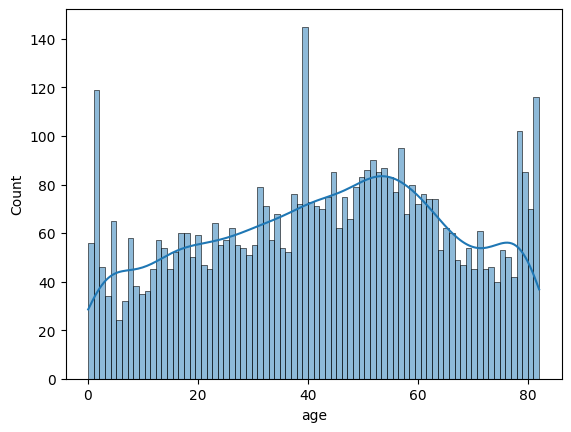

In [ ]:
sns.histplot(df["age"], bins =80 , kde = True)

In [ ]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df["age"].value_counts()

,count
age,
78.00,102
57.00,95
52.00,90
54.00,87
51.00,86
79.00,85
45.00,85
53.00,85
55.00,83


<Axes: xlabel='hypertension', ylabel='count'>

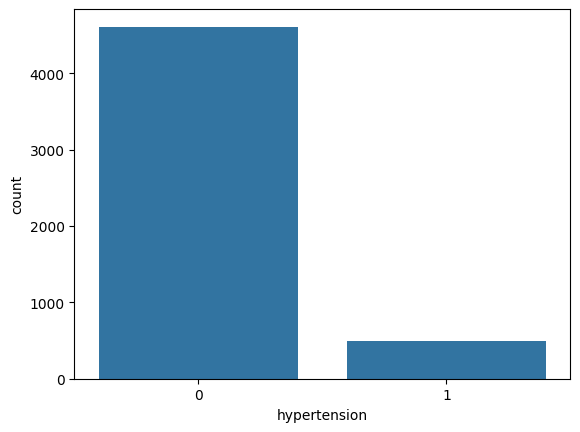

In [ ]:
sns.countplot(x = df['hypertension'])

In [ ]:
df["hypertension"].value_counts()

,count
hypertension,
0,4612
1,498


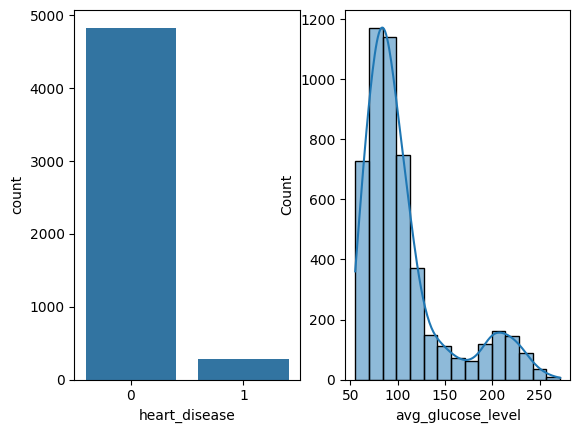

In [ ]:
plt.subplot(1,2,1)
sns.countplot( x = df["heart_disease"])
plt.subplot(1,2,2)
sns.histplot(df["avg_glucose_level"],bins = 15, kde = True)
plt.show()


<Axes: xlabel='bmi', ylabel='Count'>

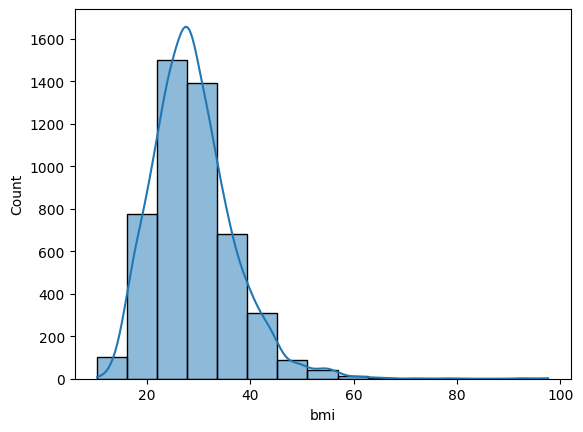

In [ ]:
sns.histplot(df["bmi"], bins = 15, kde = True)

In [ ]:
df['bmi'].value_counts()

,count
bmi,
28.7,41
28.4,38
27.7,37
27.6,37
26.7,37
26.1,37
27.3,36
23.4,36
27.0,35


In [ ]:
df["gender"].value_counts()


,count
gender,
Female,2994
Male,2115
Other,1


In [ ]:
df["ever_married"].value_counts()

,count
ever_married,
Yes,3353
No,1757


In [ ]:
df.head(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [ ]:
df["work_type"].value_counts()

,count
work_type,
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


In [ ]:
df["Residence_type"].value_counts()

,count
Residence_type,
Urban,2596
Rural,2514


In [ ]:
df["smoking_status"].value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


<Axes: >

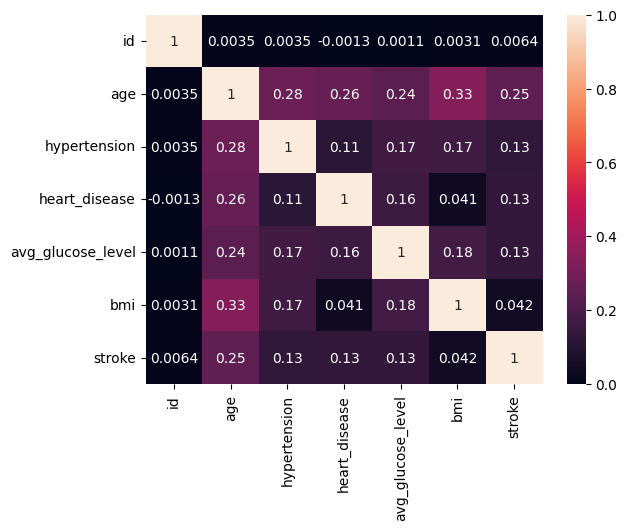

In [ ]:

sns.heatmap(df.corr(numeric_only= True), annot = True)

## Data Cleaning and Preprocessing

In [ ]:
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
df.dropna(inplace = True)
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [ ]:
df.shape

(4909, 12)

In [ ]:
rows_to_drop = df[df['smoking_status'] == 'Unknown'].index


df.drop(rows_to_drop, inplace=True)
df.shape

(3426, 12)

In [ ]:
rows_to_drop = df[df['gender'] == 'Other'].index


df.drop(rows_to_drop, inplace=True)
df.shape


(3425, 12)

In [ ]:
df = df[df['age'] > 8]
df.shape


(3425, 12)

In [ ]:
df["age"] = df["age"].astype(int)
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1
10,12109,Female,81,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,12095,Female,61,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
12,12175,Female,54,0,0,Yes,Private,Urban,104.51,27.3,smokes,1


In [ ]:
df.drop("id", axis = 1, inplace = True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df["gender"].value_counts()

,count
gender,
Female,2086
Male,1339


In [ ]:
df["gender"] = df['gender'].map({"Male" :0, "Female":1})

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,0,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,1,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,0,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df.rename(columns={
    'gender' :'is_female',

                          },inplace = True)
df.head()

,is_female,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,0,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,1,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,0,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df["ever_married"] = df['ever_married'].map({"Yes" :0, "No":1})

df.head(10)

,is_female,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,0,Private,Urban,228.69,36.6,formerly smoked,1
2,0,80,0,1,0,Private,Rural,105.92,32.5,never smoked,1
3,1,49,0,0,0,Private,Urban,171.23,34.4,smokes,1
4,1,79,1,0,0,Self-employed,Rural,174.12,24.0,never smoked,1
5,0,81,0,0,0,Private,Urban,186.21,29.0,formerly smoked,1
6,0,74,1,1,0,Private,Rural,70.09,27.4,never smoked,1
7,1,69,0,0,1,Private,Urban,94.39,22.8,never smoked,1
10,1,81,1,0,0,Private,Rural,80.43,29.7,never smoked,1
11,1,61,0,1,0,Govt_job,Rural,120.46,36.8,smokes,1
12,1,54,0,0,0,Private,Urban,104.51,27.3,smokes,1


In [ ]:
df["Residence_type"] = df['Residence_type'].map({"Urban" :0, "Rural":1})

df.head(10)

,is_female,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,0,Private,0,228.69,36.6,formerly smoked,1
2,0,80,0,1,0,Private,1,105.92,32.5,never smoked,1
3,1,49,0,0,0,Private,0,171.23,34.4,smokes,1
4,1,79,1,0,0,Self-employed,1,174.12,24.0,never smoked,1
5,0,81,0,0,0,Private,0,186.21,29.0,formerly smoked,1
6,0,74,1,1,0,Private,1,70.09,27.4,never smoked,1
7,1,69,0,0,1,Private,0,94.39,22.8,never smoked,1
10,1,81,1,0,0,Private,1,80.43,29.7,never smoked,1
11,1,61,0,1,0,Govt_job,1,120.46,36.8,smokes,1
12,1,54,0,0,0,Private,0,104.51,27.3,smokes,1


In [ ]:
df.rename(columns={
    'is_urban' :'is_rural',

                          },inplace = True)
df.head()

,is_female,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,0,Private,0,228.69,36.6,formerly smoked,1
2,0,80,0,1,0,Private,1,105.92,32.5,never smoked,1
3,1,49,0,0,0,Private,0,171.23,34.4,smokes,1
4,1,79,1,0,0,Self-employed,1,174.12,24.0,never smoked,1
5,0,81,0,0,0,Private,0,186.21,29.0,formerly smoked,1


In [ ]:
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'])
df.head()

,is_female,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67,0,1,0,0,228.69,36.6,1,False,False,True,False,False,True,False,False
2,0,80,0,1,0,1,105.92,32.5,1,False,False,True,False,False,False,True,False
3,1,49,0,0,0,0,171.23,34.4,1,False,False,True,False,False,False,False,True
4,1,79,1,0,0,1,174.12,24.0,1,False,False,False,True,False,False,True,False
5,0,81,0,0,0,0,186.21,29.0,1,False,False,True,False,False,True,False,False


In [ ]:
df = df.astype(int)
df.head()

,is_female,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67,0,1,0,0,228,36,1,0,0,1,0,0,1,0,0
2,0,80,0,1,0,1,105,32,1,0,0,1,0,0,0,1,0
3,1,49,0,0,0,0,171,34,1,0,0,1,0,0,0,0,1
4,1,79,1,0,0,1,174,24,1,0,0,0,1,0,0,1,0
5,0,81,0,0,0,0,186,29,1,0,0,1,0,0,1,0,0


# Feature Engineering and Extraction

In [ ]:
df['bmi_category'] = pd.cut(
    df['bmi'],
    bins=[0, 18.5, 24.9, 29.9, float('inf')],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)
df.head()

,is_female,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,bmi_category
0,0,67,0,1,0,0,228,36,1,0,0,1,0,0,1,0,0,Obese
2,0,80,0,1,0,1,105,32,1,0,0,1,0,0,0,1,0,Obese
3,1,49,0,0,0,0,171,34,1,0,0,1,0,0,0,0,1,Obese
4,1,79,1,0,0,1,174,24,1,0,0,0,1,0,0,1,0,Normal
5,0,81,0,0,0,0,186,29,1,0,0,1,0,0,1,0,0,Overweight


In [ ]:
df["Diabetic"]= pd.cut(df["avg_glucose_level"], bins=[0, 117,137, float('inf')], labels=["Normal",'Non-Diabetic', 'Diabetic'])
df.head()

,is_female,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,bmi_category,Diabetic
0,0,67,0,1,0,0,228,36,1,0,0,1,0,0,1,0,0,Obese,Diabetic
2,0,80,0,1,0,1,105,32,1,0,0,1,0,0,0,1,0,Obese,Normal
3,1,49,0,0,0,0,171,34,1,0,0,1,0,0,0,0,1,Obese,Diabetic
4,1,79,1,0,0,1,174,24,1,0,0,0,1,0,0,1,0,Normal,Diabetic
5,0,81,0,0,0,0,186,29,1,0,0,1,0,0,1,0,0,Overweight,Diabetic


In [ ]:
df["Diabetic"] = df['Diabetic'].map({"Normal" :0, "Non-Diabetic":1, "Diabetic":2})
df.head()

,is_female,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,bmi_category,Diabetic
0,0,67,0,1,0,0,228,36,1,0,0,1,0,0,1,0,0,Obese,2
2,0,80,0,1,0,1,105,32,1,0,0,1,0,0,0,1,0,Obese,0
3,1,49,0,0,0,0,171,34,1,0,0,1,0,0,0,0,1,Obese,2
4,1,79,1,0,0,1,174,24,1,0,0,0,1,0,0,1,0,Normal,2
5,0,81,0,0,0,0,186,29,1,0,0,1,0,0,1,0,0,Overweight,2


In [ ]:
df["bmi_category"] = df['bmi_category'].map({"Underweight" :0, "Normal":1, "Overweight":2, "Obese":3})
df.head()

,is_female,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,bmi_category,Diabetic
0,0,67,0,1,0,0,228,36,1,0,0,1,0,0,1,0,0,3,2
2,0,80,0,1,0,1,105,32,1,0,0,1,0,0,0,1,0,3,0
3,1,49,0,0,0,0,171,34,1,0,0,1,0,0,0,0,1,3,2
4,1,79,1,0,0,1,174,24,1,0,0,0,1,0,0,1,0,1,2
5,0,81,0,0,0,0,186,29,1,0,0,1,0,0,1,0,0,2,2


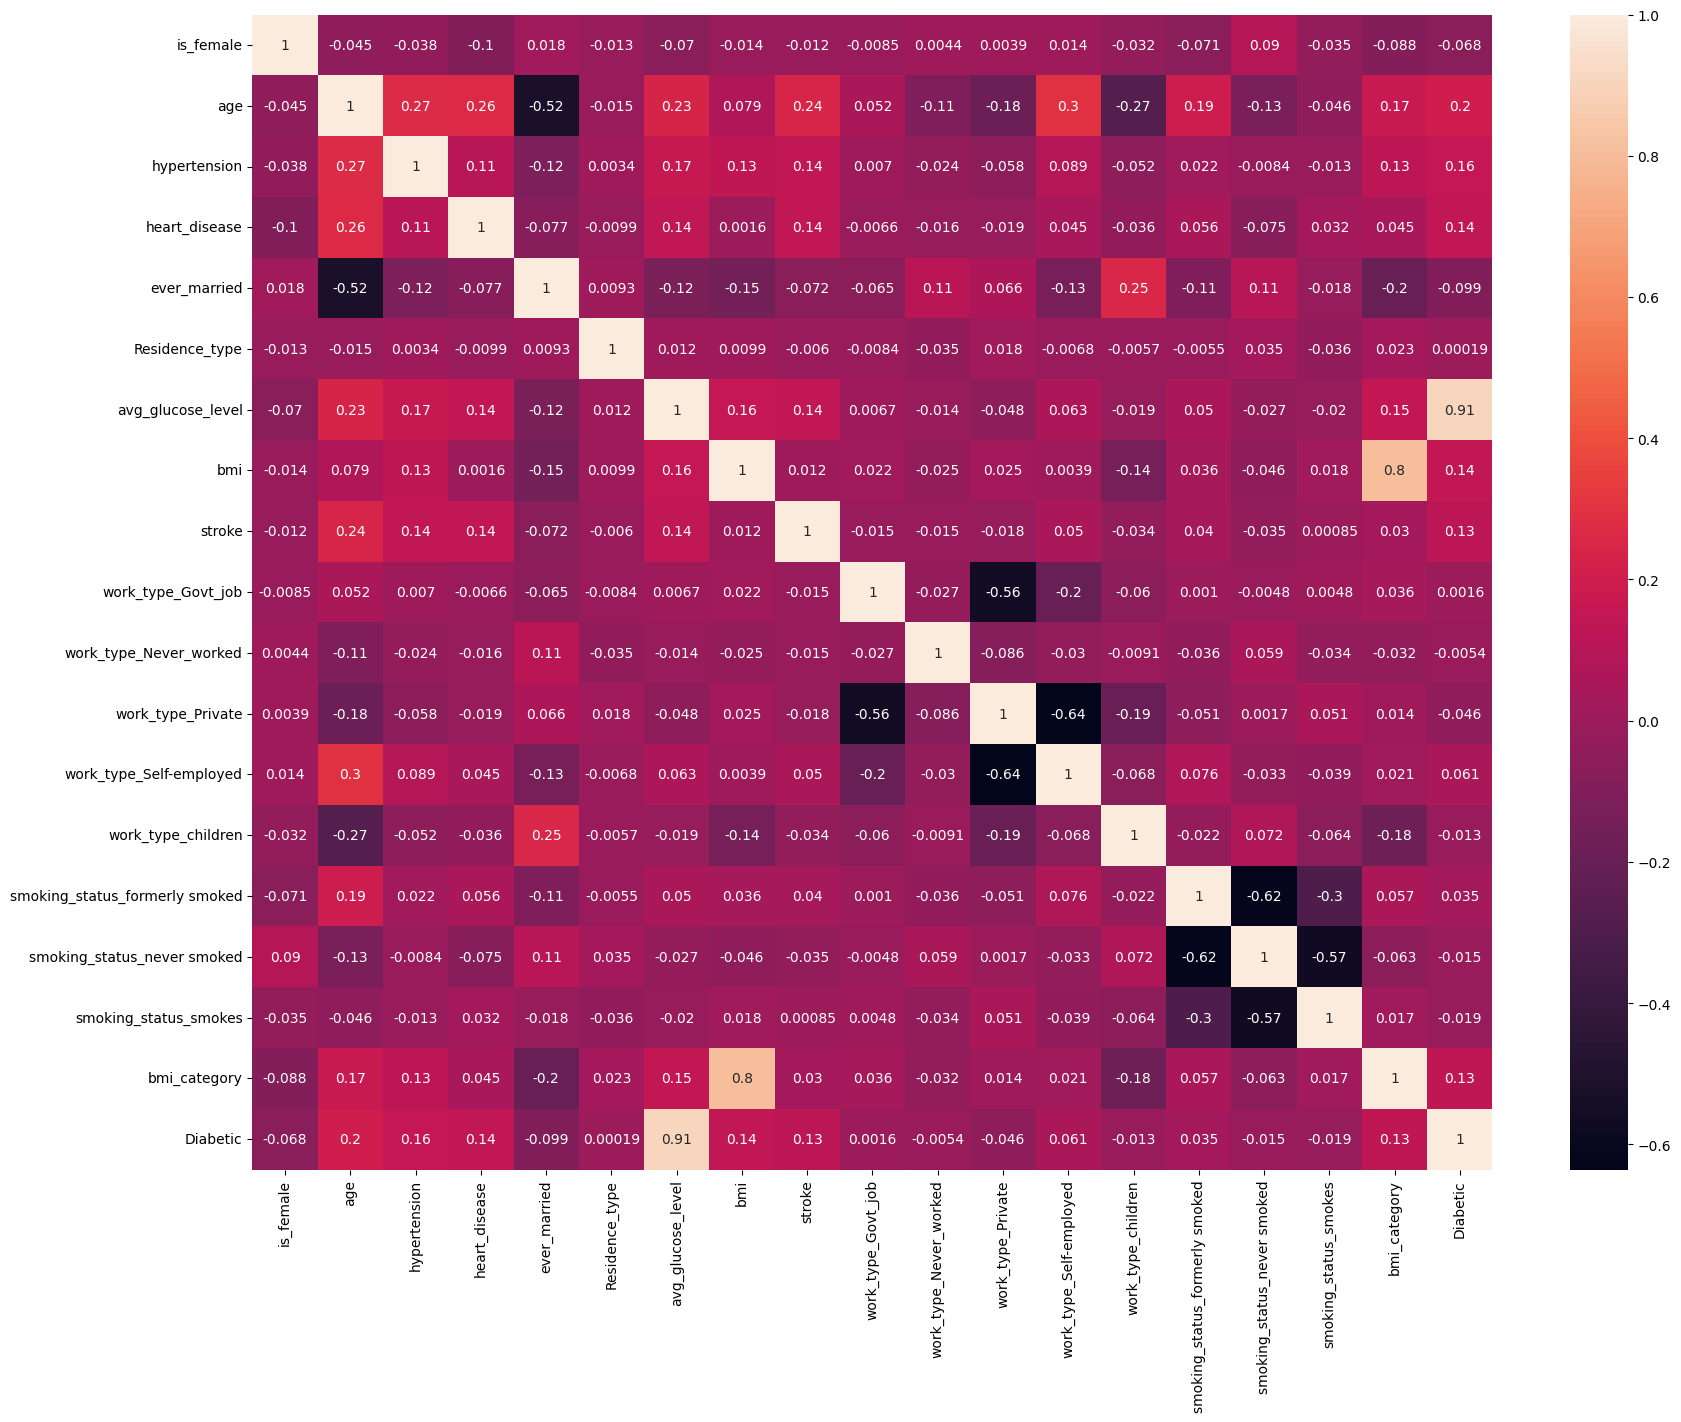

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,is_female,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,bmi_category,Diabetic
0,0,67,0,1,0,0,228,36,1,0,0,1,0,0,1,0,0,3,2
2,0,80,0,1,0,1,105,32,1,0,0,1,0,0,0,1,0,3,0
3,1,49,0,0,0,0,171,34,1,0,0,1,0,0,0,0,1,3,2
4,1,79,1,0,0,1,174,24,1,0,0,0,1,0,0,1,0,1,2
5,0,81,0,0,0,0,186,29,1,0,0,1,0,0,1,0,0,2,2


In [ ]:
X = df.drop(['stroke','bmi','ever_married'] ,axis=1)
y = df['stroke']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df["avg_glucose_level"] = scaler.fit_transform(df[["avg_glucose_level"]])
df["bmi"] = scaler.fit_transform(df[["bmi"]])
df["age"] = scaler.fit_transform(df[["age"]])
df.head()

,is_female,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,bmi_category,Diabetic
0,0,0.973480,0,1,0,0,2.519948,0.844550,1,0,0,1,0,0,1,0,0,3,2
2,0,1.663236,0,1,0,1,-0.059240,0.295542,1,0,0,1,0,0,0,1,0,3,0
3,1,0.018435,0,0,0,0,1.324714,0.570046,1,0,0,1,0,0,0,0,1,3,2
4,1,1.610178,1,0,0,1,1.387621,-0.802473,1,0,0,0,1,0,0,1,0,1,2
5,0,1.716294,0,0,0,0,1.639249,-0.116213,1,0,0,1,0,0,1,0,0,2,2


# Model Building

In [ ]:
from scipy.stats import pearsonr

selected_features = ['is_female', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'bmi_category', 'Diabetic']

correlations = {
    feature: pearsonr(df[feature], df['stroke'])[0]
    for feature in selected_features
}

correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])

correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
8,stroke,1.000000
1,age,0.242465
2,hypertension,0.143626
6,avg_glucose_level,0.140545
3,heart_disease,0.138538
18,Diabetic,0.125431
12,work_type_Self-employed,0.050497
14,smoking_status_formerly smoked,0.039795
17,bmi_category,0.030460
7,bmi,0.011779


In [ ]:
cat_features = ['is_female', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'bmi_category', 'Diabetic']

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd


alpha = 0.05

chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df[col], df['stroke'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
hypertension,68.679164,0.0,Reject Null (Keep Feature)
heart_disease,63.150338,0.0,Reject Null (Keep Feature)
Diabetic,57.181559,0.0,Reject Null (Keep Feature)
ever_married,16.817703,0.000041,Reject Null (Keep Feature)
work_type_Self-employed,8.158785,0.004285,Reject Null (Keep Feature)
smoking_status_formerly smoked,5.016816,0.025102,Reject Null (Keep Feature)
smoking_status_never smoked,3.887514,0.048646,Reject Null (Keep Feature)
work_type_children,2.846844,0.091554,Accept Null (Drop Feature)
bmi_category,5.390102,0.145361,Accept Null (Drop Feature)
work_type_Private,0.956094,0.328173,Accept Null (Drop Feature)


In [ ]:
final_df = df[['is_female', 'age', 'hypertension', 'heart_disease',
        'avg_glucose_level', 'bmi', 'stroke', 'work_type_Private',


       'smoking_status_smokes', 'bmi_category', 'Diabetic']]

In [ ]:
final_df.head()


,is_female,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Private,smoking_status_smokes,bmi_category,Diabetic
0,0,0.973480,0,1,2.519948,0.844550,1,1,0,3,2
2,0,1.663236,0,1,-0.059240,0.295542,1,1,0,3,0
3,1,0.018435,0,0,1.324714,0.570046,1,1,1,3,2
4,1,1.610178,1,0,1.387621,-0.802473,1,0,0,1,2
5,0,1.716294,0,0,1.639249,-0.116213,1,1,0,2,2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = final_df.drop('stroke', axis=1)
y = final_df['stroke']

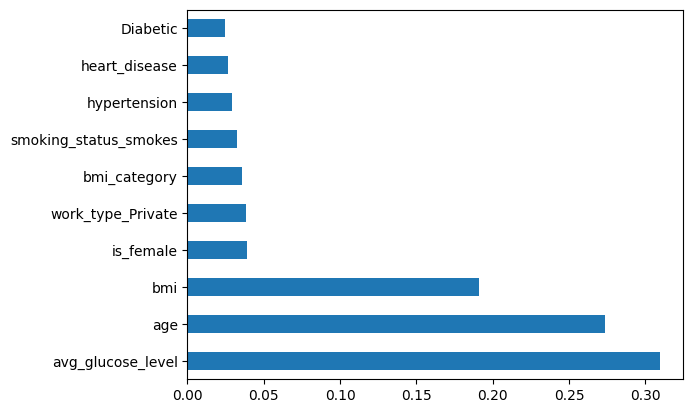

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C= 1, class_weight= "balanced", max_iter= 100, penalty= 'l1', solver= 'saga')

model.fit(X_train,y_train)

LogisticRegression(C=1, class_weight='balanced', penalty='l1', solver='saga')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7206012378426172
Confusion Matrix:
 [[766 302]
 [ 14  49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.72      0.83      1068
           1       0.14      0.78      0.24        63

    accuracy                           0.72      1131
   macro avg       0.56      0.75      0.53      1131
weighted avg       0.94      0.72      0.80      1131



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
classifier = GridSearchCV((model),{   'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000],
    'class_weight': [ 'balanced']
},cv = 5,return_train_score = False)

In [ ]:
classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=1, class_weight='balanced',
                                          penalty='l1', solver='saga'),
             param_grid={'C': [0.01, 0.1, 1, 10], 'class_weight': ['balanced'],
                         'max_iter': [100, 500, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [ ]:
results = pd.DataFrame(classifier.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_max_iter,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006232,0.000828,0.002308,0.000445,0.01,balanced,100,l1,liblinear,"{'C': 0.01, 'class_weight': 'balanced', 'max_i...",0.647059,0.616558,0.642702,0.636166,0.620087,0.632514,0.012147,46
1,0.015591,0.002089,0.002346,0.000107,0.01,balanced,100,l1,saga,"{'C': 0.01, 'class_weight': 'balanced', 'max_i...",0.740741,0.699346,0.710240,0.684096,0.709607,0.708806,0.018561,40
2,0.005548,0.000432,0.002150,0.000193,0.01,balanced,100,l2,liblinear,"{'C': 0.01, 'class_weight': 'balanced', 'max_i...",0.710240,0.705882,0.723312,0.699346,0.698690,0.707494,0.008991,43
3,0.013956,0.001475,0.002300,0.000051,0.01,balanced,100,l2,saga,"{'C': 0.01, 'class_weight': 'balanced', 'max_i...",0.742919,0.721133,0.745098,0.716776,0.713974,0.727980,0.013303,28
4,0.004971,0.000283,0.002076,0.000167,0.01,balanced,500,l1,liblinear,"{'C': 0.01, 'class_weight': 'balanced', 'max_i...",0.647059,0.616558,0.642702,0.636166,0.620087,0.632514,0.012147,46


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb1 = GradientBoostingClassifier(random_state=42, n_estimators= 105)
model_gb1.fit(X_train, y_train)


y_pred_gb = model_gb1.predict(X_test)


print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred))

Gradient Boosting Accuracy: 0.7206012378426172
Gradient Boosting Confusion Matrix:
 [[766 302]
 [ 14  49]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.72      0.83      1068
           1       0.14      0.78      0.24        63

    accuracy                           0.72      1131
   macro avg       0.56      0.75      0.53      1131
weighted avg       0.94      0.72      0.80      1131



In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter


print(f"Original dataset shape {Counter(y_train)}")


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"Resampled dataset shape {Counter(y_train_res)}")

Original dataset shape Counter({0: 2177, 1: 117})
Resampled dataset shape Counter({0: 2177, 1: 2177})


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train_res_imputed = imputer.fit_transform(X_train_res)
X_test_imputed = imputer.transform(X_test)



model_res = LogisticRegression()
model_res.fit(X_train_res_imputed, y_train_res)


y_pred_res = model_res.predict(X_test_imputed)


print("Accuracy:", accuracy_score(y_test, y_pred_res))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_res))
print("Classification Report:\n", classification_report(y_test, y_pred_res))

Accuracy: 0.7303271441202476
Confusion Matrix:
 [[786 282]
 [ 23  40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.74      0.84      1068
           1       0.12      0.63      0.21        63

    accuracy                           0.73      1131
   macro avg       0.55      0.69      0.52      1131
weighted avg       0.92      0.73      0.80      1131



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


model_gb = GradientBoostingClassifier()
model_gb.fit(X_train_res_imputed, y_train_res)


y_pred_gb = model_gb.predict(X_test_imputed)


print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8408488063660478
Gradient Boosting Confusion Matrix:
 [[927 141]
 [ 39  24]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91      1068
           1       0.15      0.38      0.21        63

    accuracy                           0.84      1131
   macro avg       0.55      0.62      0.56      1131
weighted avg       0.91      0.84      0.87      1131



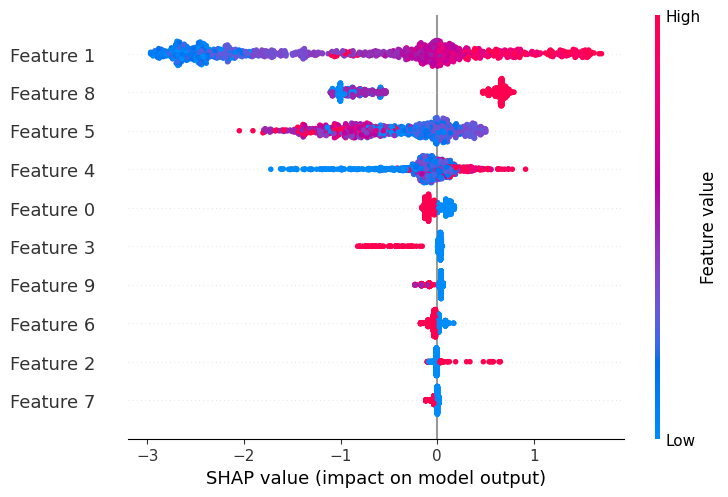

In [ ]:
import shap
explainer = shap.Explainer(model_gb, X_train_res_imputed)
shap_values = explainer(X_test_imputed)


shap.plots.beeswarm(shap_values)


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


imputer = SimpleImputer(strategy='median')
X_train_res_imputed = imputer.fit_transform(X_train_res)
X_test_imputed = imputer.transform(X_test)


model_dt = DecisionTreeClassifier(random_state=42)
model_ab = AdaBoostClassifier(random_state=42)

model_dt.fit(X_train_res_imputed, y_train_res)
model_ab.fit(X_train_res_imputed, y_train_res)


y_pred_dt = model_dt.predict(X_test_imputed)
y_pred_ab = model_ab.predict(X_test_imputed)


print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

print("\n" + "="*50 + "\n")

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ab))
print("AdaBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ab))
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred_ab))

Decision Tree Accuracy: 0.865605658709107
Decision Tree Confusion Matrix:
 [[968 100]
 [ 52  11]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1068
           1       0.10      0.17      0.13        63

    accuracy                           0.87      1131
   macro avg       0.52      0.54      0.53      1131
weighted avg       0.90      0.87      0.88      1131



AdaBoost Accuracy: 0.6861184792219275
AdaBoost Confusion Matrix:
 [[726 342]
 [ 13  50]]
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.68      0.80      1068
           1       0.13      0.79      0.22        63

    accuracy                           0.69      1131
   macro avg       0.55      0.74      0.51      1131
weighted avg       0.93      0.69      0.77      1131



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import ADASYN
from collections import Counter

adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)


imputer = SimpleImputer(strategy='median')
X_train_adasyn_imputed = imputer.fit_transform(X_train_adasyn)
X_test_imputed_adasyn = imputer.transform(X_test)

print(f"ADASYN resampled dataset shape {Counter(y_train_adasyn)}")


model_adgb = GradientBoostingClassifier(loss= 'log_loss')
model_adgb.fit(X_train_adasyn_imputed, y_train_adasyn)


y_pred_adgb = model_adgb.predict(X_test_imputed_adasyn)
print("Gradient Boosting with ADASYN Accuracy:", accuracy_score(y_test, y_pred_adgb))
print("Gradient Boosting with ADASYN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adgb))
print("Gradient Boosting with ADASYN Classification Report:\n", classification_report(y_test, y_pred_adgb))

ADASYN resampled dataset shape Counter({0: 2177, 1: 2171})
Gradient Boosting with ADASYN Accuracy: 0.8213969938107869
Gradient Boosting with ADASYN Confusion Matrix:
 [[901 167]
 [ 35  28]]
Gradient Boosting with ADASYN Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90      1068
           1       0.14      0.44      0.22        63

    accuracy                           0.82      1131
   macro avg       0.55      0.64      0.56      1131
weighted avg       0.92      0.82      0.86      1131



In [ ]:
from xgboost import XGBClassifier


model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train_res_imputed, y_train_res)


y_pred_xgb = model_xgb.predict(X_test_imputed)


print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9239610963748894
XGBoost Confusion Matrix:
 [[1035   33]
 [  53   10]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1068
           1       0.23      0.16      0.19        63

    accuracy                           0.92      1131
   macro avg       0.59      0.56      0.57      1131
weighted avg       0.91      0.92      0.92      1131



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


model_dt = DecisionTreeClassifier(random_state=42)
model_ab = AdaBoostClassifier(random_state=42)


model_dt.fit(X_train_adasyn_imputed, y_train_adasyn)
model_ab.fit(X_train_adasyn_imputed, y_train_adasyn)


y_pred_dt = model_dt.predict(X_test_imputed_adasyn)
y_pred_ab = model_ab.predict(X_test_imputed_adasyn)


print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

print("\n" + "="*50 + "\n")


print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ab))
print("AdaBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ab))
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred_ab))

Decision Tree Accuracy: 0.8603006189213086
Decision Tree Confusion Matrix:
 [[957 111]
 [ 47  16]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      1068
           1       0.13      0.25      0.17        63

    accuracy                           0.86      1131
   macro avg       0.54      0.58      0.55      1131
weighted avg       0.91      0.86      0.88      1131



AdaBoost Accuracy: 0.6852343059239611
AdaBoost Confusion Matrix:
 [[724 344]
 [ 12  51]]
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.68      0.80      1068
           1       0.13      0.81      0.22        63

    accuracy                           0.69      1131
   macro avg       0.56      0.74      0.51      1131
weighted avg       0.94      0.69      0.77      1131



In [ ]:
from sklearn.ensemble  import StackingClassifier


base_lr = LogisticRegression(random_state=42, class_weight='balanced')
base_gb = GradientBoostingClassifier(random_state=42)

final_estimator_lr = LogisticRegression(random_state=42, class_weight='balanced')

stacked_model_smote = StackingClassifier(
    estimators=[('lr', base_lr), ('gb', base_gb)],
    final_estimator=final_estimator_lr,
    cv=5
)

stacked_model_smote.fit(X_train_res_imputed, y_train_res)


y_pred_stacked_smote = stacked_model_smote.predict(X_test_imputed)


print("Stacked Model (LR + GB Bases, LR Final) on SMOTE Accuracy:", accuracy_score(y_test, y_pred_stacked_smote))
print("Stacked Model (LR + GB Bases, LR Final) on SMOTE Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stacked_smote))
print("Stacked Model (LR + GB Bases, LR Final) on SMOTE Classification Report:\n", classification_report(y_test, y_pred_stacked_smote))

Stacked Model (LR + GB Bases, LR Final) on SMOTE Accuracy: 0.8762157382847038
Stacked Model (LR + GB Bases, LR Final) on SMOTE Confusion Matrix:
 [[972  96]
 [ 44  19]]
Stacked Model (LR + GB Bases, LR Final) on SMOTE Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      1068
           1       0.17      0.30      0.21        63

    accuracy                           0.88      1131
   macro avg       0.56      0.61      0.57      1131
weighted avg       0.91      0.88      0.89      1131



In [ ]:
from sklearn.svm import SVC
model_svm1 = SVC(random_state=42, degree= 4, class_weight = "balanced", kernel= "poly")
model_svm1.fit(X_train_adasyn_imputed, y_train_adasyn)
y_pred_svm1 = model_svm1.predict(X_test_imputed_adasyn)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm1))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm1))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm1))


SVM Accuracy: 0.78868258178603
SVM Confusion Matrix:
 [[862 206]
 [ 33  30]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.81      0.88      1068
           1       0.13      0.48      0.20        63

    accuracy                           0.79      1131
   macro avg       0.55      0.64      0.54      1131
weighted avg       0.92      0.79      0.84      1131



In [ ]:
model_svm = SVC( )
model_svm.fit(X_train_adasyn, y_train_adasyn)
y_pred_svm = model_svm.predict(X_test_imputed)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.757736516357206
SVM Confusion Matrix:
 [[817 251]
 [ 23  40]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.76      0.86      1068
           1       0.14      0.63      0.23        63

    accuracy                           0.76      1131
   macro avg       0.56      0.70      0.54      1131
weighted avg       0.93      0.76      0.82      1131



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC


model_svm = SVC(random_state=42)


cv_scores = cross_val_score(model_svm, X_train_adasyn_imputed, y_train_adasyn, cv=5, scoring='f1')

print("Cross-validation F1 scores:", cv_scores)
print("Mean F1 score:", cv_scores.mean())

Cross-validation F1 scores: [0.76765376 0.81344902 0.81570338 0.75144509 0.80217391]
Mean F1 score: 0.7900850325481741


In [ ]:
from sklearn.model_selection import StratifiedKFold


n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


model_svm = SVC(random_state=42)


for fold, (train_index, val_index) in enumerate(skf.split(X_train_adasyn_imputed, y_train_adasyn)):
    print(f"--- Fold {fold+1}/{n_splits} ---")


    X_train_fold, X_val_fold = X_train_adasyn_imputed[train_index], X_train_adasyn_imputed[val_index]
    y_train_fold, y_val_fold = y_train_adasyn[train_index], y_train_adasyn[val_index]


    model_svm.fit(X_train_fold, y_train_fold)


    y_pred_fold = model_svm.predict(X_val_fold)


    print(classification_report(y_val_fold, y_pred_fold))

print("--- Cross-validation finished ---")

--- Fold 1/5 ---
              precision    recall  f1-score   support

           0       0.84      0.73      0.79       436
           1       0.76      0.86      0.81       434

    accuracy                           0.80       870
   macro avg       0.80      0.80      0.80       870
weighted avg       0.80      0.80      0.80       870

--- Fold 2/5 ---
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       436
           1       0.77      0.84      0.81       434

    accuracy                           0.80       870
   macro avg       0.80      0.80      0.80       870
weighted avg       0.80      0.80      0.80       870

--- Fold 3/5 ---
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       435
           1       0.75      0.88      0.81       435

    accuracy                           0.79       870
   macro avg       0.80      0.79      0.79       870
weighted avg       0.80

In [ ]:





base_lr2 = LogisticRegression(random_state=42, class_weight='balanced')
base_gb2 = GradientBoostingClassifier(random_state=42)
final_estimator_lr2 = LogisticRegression(random_state=42, class_weight='balanced')

stacked_model_adasyn = StackingClassifier(
    estimators=[('lr', base_lr), ('gb', base_gb)],
    final_estimator=final_estimator_lr,
    cv=5
)


stacked_model_adasyn.fit(X_train_adasyn_imputed, y_train_adasyn)

y_pred_stacked_adasyn = stacked_model_adasyn.predict(X_test_imputed_adasyn)


print("Stacked Model (LR + GB Bases, LR Final) on ADASYN Accuracy:", accuracy_score(y_test, y_pred_stacked_adasyn))
print("Stacked Model (LR + GB Bases, LR Final) on ADASYN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stacked_adasyn))
print("Stacked Model (LR + GB Bases, LR Final) on ADASYN Classification Report:\n", classification_report(y_test, y_pred_stacked_adasyn))

Stacked Model (LR + GB Bases, LR Final) on ADASYN Accuracy: 0.8196286472148541
Stacked Model (LR + GB Bases, LR Final) on ADASYN Confusion Matrix:
 [[900 168]
 [ 36  27]]
Stacked Model (LR + GB Bases, LR Final) on ADASYN Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90      1068
           1       0.14      0.43      0.21        63

    accuracy                           0.82      1131
   macro avg       0.55      0.64      0.55      1131
weighted avg       0.92      0.82      0.86      1131



In [ ]:
base_svm = SVC()
base_gb3 = GradientBoostingClassifier(random_state=42)
final_estimator_svm = SVC(random_state=42, class_weight='balanced')


stacked_model_svm = StackingClassifier(
    estimators=[('svm', base_svm), ('gb', base_gb)],
    final_estimator=final_estimator_svm,
    cv=5
)

stacked_model_svm.fit(X_train_adasyn_imputed, y_train_adasyn)

y_pred_stacked_svm = stacked_model_svm.predict(X_test_imputed_adasyn)

print("Stacked Model (SVM + GB Bases, SVM Final) on ADASYN Accuracy:", accuracy_score(y_test, y_pred_stacked_svm))
print("Stacked Model (SVM + GB Bases, SVM Final) on ADASYN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stacked_svm))
print("Stacked Model (SVM + GB Bases, SVM Final) on ADASYN Classification Report:\n", classification_report(y_test, y_pred_stacked_svm))


Stacked Model (SVM + GB Bases, SVM Final) on ADASYN Accuracy: 0.8045977011494253
Stacked Model (SVM + GB Bases, SVM Final) on ADASYN Confusion Matrix:
 [[880 188]
 [ 33  30]]
Stacked Model (SVM + GB Bases, SVM Final) on ADASYN Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.82      0.89      1068
           1       0.14      0.48      0.21        63

    accuracy                           0.80      1131
   macro avg       0.55      0.65      0.55      1131
weighted avg       0.92      0.80      0.85      1131



In [ ]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_train_adasyn_imputed, y_train_adasyn)


y_pred_nb = model_nb.predict(X_test_imputed_adasyn)


print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.7276746242263483
Naive Bayes Confusion Matrix:
 [[781 287]
 [ 21  42]]
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.73      0.84      1068
           1       0.13      0.67      0.21        63

    accuracy                           0.73      1131
   macro avg       0.55      0.70      0.52      1131
weighted avg       0.93      0.73      0.80      1131



In [ ]:



base_nb = GaussianNB()
base_gb = GradientBoostingClassifier(random_state=42)


final_estimator_svm = SVC(random_state=42, class_weight='balanced')

stacked_model_nb_gb_svm = StackingClassifier(
    estimators=[('nb', base_nb), ('gb', base_gb)],
    final_estimator=final_estimator_svm,
    cv=5
)

stacked_model_nb_gb_svm.fit(X_train_adasyn_imputed, y_train_adasyn)

y_pred_stacked_nb_gb_svm = stacked_model_nb_gb_svm.predict(X_test_imputed_adasyn)


print("Stacked Model (Naive Bayes + GB Bases, SVM Final) on ADASYN Accuracy:", accuracy_score(y_test, y_pred_stacked_nb_gb_svm))
print("Stacked Model (Naive Bayes + GB Bases, SVM Final) on ADASYN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stacked_nb_gb_svm))
print("Stacked Model (Naive Bayes + GB Bases, SVM Final) on ADASYN Classification Report:\n", classification_report(y_test, y_pred_stacked_nb_gb_svm))

Stacked Model (Naive Bayes + GB Bases, SVM Final) on ADASYN Accuracy: 0.8293545534924845
Stacked Model (Naive Bayes + GB Bases, SVM Final) on ADASYN Confusion Matrix:
 [[913 155]
 [ 38  25]]
Stacked Model (Naive Bayes + GB Bases, SVM Final) on ADASYN Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90      1068
           1       0.14      0.40      0.21        63

    accuracy                           0.83      1131
   macro avg       0.55      0.63      0.56      1131
weighted avg       0.91      0.83      0.87      1131



In [ ]:
model_xgb1 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb1.fit(X_train_adasyn_imputed, y_train_adasyn)


y_pred_xgb = model_xgb.predict(X_test_imputed_adasyn)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9239610963748894
XGBoost Confusion Matrix:
 [[1035   33]
 [  53   10]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1068
           1       0.23      0.16      0.19        63

    accuracy                           0.92      1131
   macro avg       0.59      0.56      0.57      1131
weighted avg       0.91      0.92      0.92      1131



In [ ]:
model_xgb2 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb2.fit(X_train_res_imputed, y_train_res)

y_pred_xgb2 = model_xgb2.predict(X_test_imputed)


print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb2))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb2))
print("XGBoost Classification Report:\n"), classification_report(y_test, y_pred_xgb2)

XGBoost Accuracy: 0.9239610963748894
XGBoost Confusion Matrix:
 [[1035   33]
 [  53   10]]
XGBoost Classification Report:



(None,
 '              precision    recall  f1-score   support\n\n           0       0.95      0.97      0.96      1068\n           1       0.23      0.16      0.19        63\n\n    accuracy                           0.92      1131\n   macro avg       0.59      0.56      0.57      1131\nweighted avg       0.91      0.92      0.92      1131\n')

In [ ]:
model_nb1 = GaussianNB()
model_nb1.fit(X_train_res_imputed, y_train_res)

y_pred_nb1 = model_nb1.predict(X_test_imputed)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb1))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb1))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb1))

Naive Bayes Accuracy: 0.731211317418214
Naive Bayes Confusion Matrix:
 [[784 284]
 [ 20  43]]
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.84      1068
           1       0.13      0.68      0.22        63

    accuracy                           0.73      1131
   macro avg       0.55      0.71      0.53      1131
weighted avg       0.93      0.73      0.80      1131



In [ ]:
base_svm1 = GaussianNB()
base_xgb = GradientBoostingClassifier(learning_rate= 0.2, n_estimators= 150, max_depth= 5)

final_nb = XGBClassifier()

stacked_model_svm_xgb_nb = StackingClassifier(estimators=[('svm', base_svm1),('xgb', base_xgb)],
                                              final_estimator = final_nb, cv = 5)

stacked_model_svm_xgb_nb.fit(X_train_adasyn_imputed, y_train_adasyn)

y_pred_stacked_svm_xgb_nb = stacked_model_svm_xgb_nb.predict(X_test_imputed_adasyn)


print("Stacked Model (SVM + XGB Bases, Naive Bayes Final) on ADASYN Accuracy:", accuracy_score(y_test, y_pred_stacked_svm_xgb_nb))
print("Stacked Model (SVM + XGB Bases, Naive Bayes Final) on ADASYN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stacked_svm_xgb_nb))
print("Stacked Model (SVM + XGB Bases, Naive Bayes Final) on ADASYN Classification Report:\n", classification_report(y_test, y_pred_stacked_svm_xgb_nb))



Stacked Model (SVM + XGB Bases, Naive Bayes Final) on ADASYN Accuracy: 0.9239610963748894
Stacked Model (SVM + XGB Bases, Naive Bayes Final) on ADASYN Confusion Matrix:
 [[1041   27]
 [  59    4]]
Stacked Model (SVM + XGB Bases, Naive Bayes Final) on ADASYN Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1068
           1       0.13      0.06      0.09        63

    accuracy                           0.92      1131
   macro avg       0.54      0.52      0.52      1131
weighted avg       0.90      0.92      0.91      1131



In [ ]:
from sklearn.naive_bayes import BernoulliNB

model_bnb = BernoulliNB()
model_bnb.fit(X_train_adasyn_imputed, y_train_adasyn)

y_pred_bnb = model_bnb.predict(X_test_imputed_adasyn)

print("Bernoulli Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_bnb))
print("Bernoulli Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bnb))
print("Bernoulli Naive Bayes Classification Report:\n",classification_report(y_test, y_pred_bnb))

Bernoulli Naive Bayes Accuracy: 0.6693191865605659
Bernoulli Naive Bayes Confusion Matrix:
 [[715 353]
 [ 21  42]]
Bernoulli Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.67      0.79      1068
           1       0.11      0.67      0.18        63

    accuracy                           0.67      1131
   macro avg       0.54      0.67      0.49      1131
weighted avg       0.92      0.67      0.76      1131



In [ ]:
base_bnb = BernoulliNB()
base_svm2 = SVC()

final_model = GradientBoostingClassifier(learning_rate= 0.2, n_estimators= 150, max_depth= 5)

stacked_model_bnb = StackingClassifier(estimators=[('bnb', base_bnb),('svm', base_svm2)],
                                              final_estimator = final_model, cv = 5)

stacked_model_bnb.fit(X_train_adasyn_imputed, y_train_adasyn)

y_pred_stacked_bnb = stacked_model_bnb.predict(X_test_imputed_adasyn)



print("Stacked Model (Bernoulli Naive Bayes + SVM Bases, Gradient Boosting Final) on ADASYN Accuracy:", accuracy_score(y_test, y_pred_stacked_bnb))
print("Stacked Model (Bernoulli Naive Bayes + SVM Bases, Gradient Boosting Final) on ADASYN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stacked_bnb))
print("Stacked Model (Bernoulli Naive Bayes + SVM Bases, Gradient Boosting Final) on ADASYN Classification Report:\n", classification_report(y_test, y_pred_stacked_bnb))

Stacked Model (Bernoulli Naive Bayes + SVM Bases, Gradient Boosting Final) on ADASYN Accuracy: 0.7824933687002652
Stacked Model (Bernoulli Naive Bayes + SVM Bases, Gradient Boosting Final) on ADASYN Confusion Matrix:
 [[853 215]
 [ 31  32]]
Stacked Model (Bernoulli Naive Bayes + SVM Bases, Gradient Boosting Final) on ADASYN Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.80      0.87      1068
           1       0.13      0.51      0.21        63

    accuracy                           0.78      1131
   macro avg       0.55      0.65      0.54      1131
weighted avg       0.92      0.78      0.84      1131



In [ ]:


import tensorflow as tf

from tensorflow.keras.models import Sequential


from tensorflow.keras.layers import Dense


from tensorflow.keras.layers import Dropout


from tensorflow.keras.utils import to_categorical

In [ ]:
from tensorflow.keras.layers import LeakyReLU, PReLU

deep_model = Sequential([
    Dense(16, input_dim=X_train_adasyn_imputed.shape[1]),
    LeakyReLU(alpha=0.01),
    Dense(8),
    PReLU(),
    Dense(4),
    LeakyReLU(),
    Dense(1, activation='sigmoid')
])

In [ ]:
deep_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['recall', 'precision', 'accuracy'])

In [ ]:
history = deep_model.fit(X_train_adasyn_imputed, y_train_adasyn, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5184 - loss: 0.6959 - precision: 0.4224 - recall: 0.7181 - val_accuracy: 0.4828 - val_loss: 0.7708 - val_precision: 1.0000 - val_recall: 0.4828
Epoch 2/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7144 - loss: 0.5496 - precision: 0.6511 - recall: 0.5311 - val_accuracy: 0.6483 - val_loss: 0.7472 - val_precision: 1.0000 - val_recall: 0.6483
Epoch 3/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7566 - loss: 0.4886 - precision: 0.6652 - recall: 0.6743 - val_accuracy: 0.6379 - val_loss: 0.7699 - val_precision: 1.0000 - val_recall: 0.6379
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7670 - loss: 0.4788 - precision: 0.6838 - recall: 0.6914 - val_accuracy: 0.6954 - val_loss: 0.6403 - val_precision: 1.0000 - val_recall: 0.6954
Epoch 5/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7694 - loss: 0.4611 - precision: 0.6779 - recall: 0.7186 - val_accuracy: 0.6770 - val_loss: 0.

In [ ]:


y_pred_deep = deep_model.predict(X_test_imputed_adasyn)
y_pred_deep_classes = (y_pred_deep > 0.5).astype("int32")

print("Deep Learning Model Accuracy:", accuracy_score(y_test, y_pred_deep_classes))
print("Deep Learning Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_deep_classes))


print("Deep Learning Model Classification Report:\n", classification_report(y_test, y_pred_deep_classes))

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Deep Learning Model Accuracy: 0.8010610079575596
Deep Learning Model Confusion Matrix:
 [[881 187]
 [ 38  25]]
Deep Learning Model Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.82      0.89      1068
           1       0.12      0.40      0.18        63

    accuracy                           0.80      1131
   macro avg       0.54      0.61      0.53      1131
weighted avg       0.91      0.80      0.85      1131



In [ ]:
import joblib

joblib.dump(model_svm, 'svm_model.pkl')

joblib.dump(X.columns.tolist(), 'feature_names.pkl')

joblib.dump(scaler , 'scaler.pkl')


['scaler.pkl']